In [2]:
import pandas as pd
med = pd.read_csv('insurance.csv')
df=med.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
df.isnull().values.any()

False

In [6]:
df.corr()

C:\Users\bakisgan\AppData\Local\Temp\ipykernel_28588\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


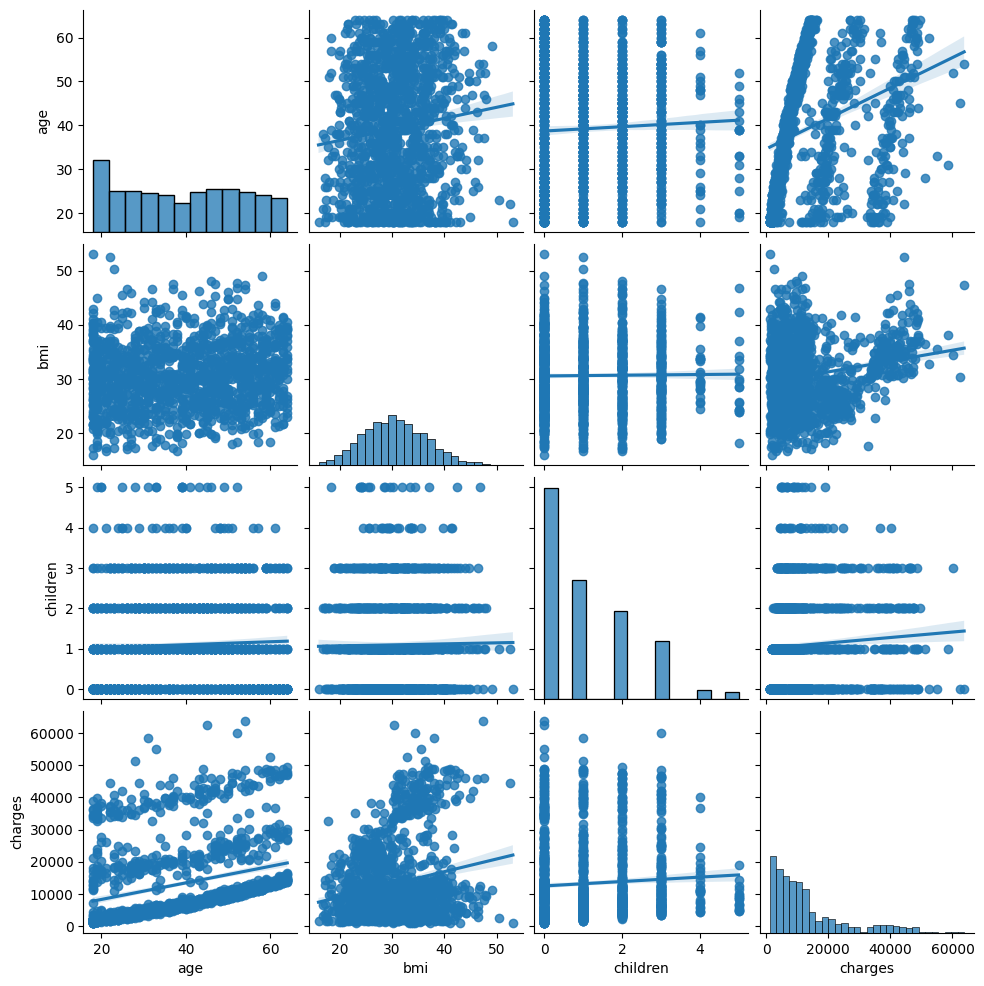

In [7]:
import seaborn as sns
sns.pairplot(df, kind="reg")

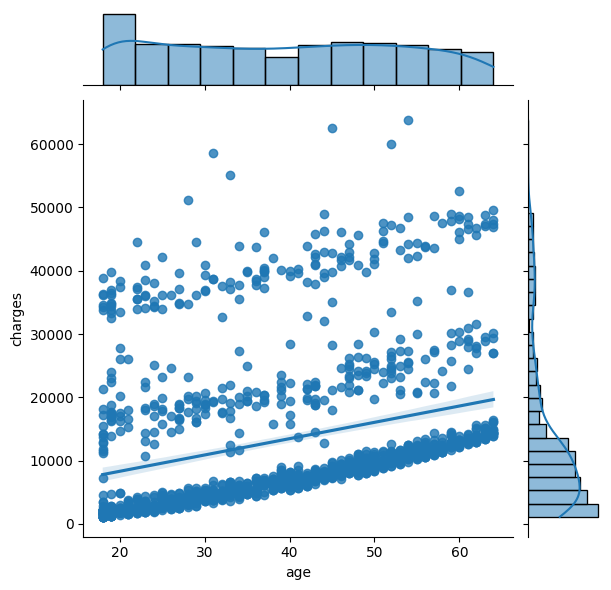

In [8]:
sns.jointplot(x="age",y="charges",data=df,kind="reg")

# Simple Linear Regression

### Choose a single independent variable with the highest correlation

In [9]:
from sklearn.linear_model import LinearRegression


In [10]:
x_slr=df[["age"]]
y_slr=df["charges"]
reg=LinearRegression()
model = reg.fit(x_slr,y_slr)
model.intercept_

3165.8850060630284

In [11]:
model.coef_

array([257.72261867])

In [12]:
r2_slr = model.score(x_slr,y_slr)

In [13]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred_slr = model.predict(x_slr)
mse_slr = mean_squared_error(y_slr, y_pred_slr)
rmse_slr = np.sqrt(mse_slr)
print(rmse_slr)

11551.66562075632


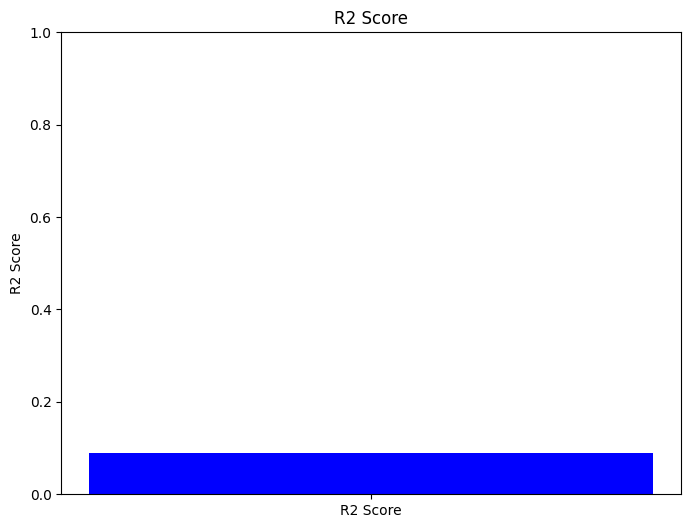

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(["R2 Score"], [r2_slr], color='blue')
plt.title("R2 Score")
plt.ylabel("R2 Score")
plt.ylim(0, 1)
plt.show()

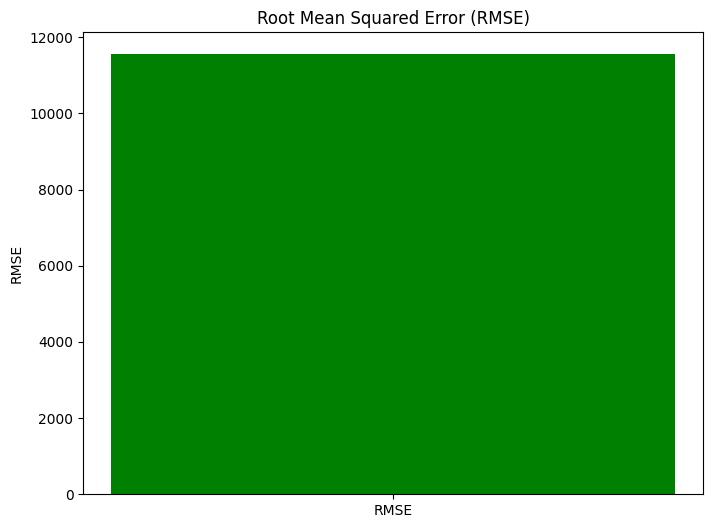

In [15]:
plt.figure(figsize=(8, 6))
plt.bar(["RMSE"], [rmse_slr], color='green')
plt.title("Root Mean Squared Error (RMSE)")
plt.ylabel("RMSE")
plt.show()

# Multiple Linear Regression

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict


In [17]:
x_mlr = df.drop("charges", axis = 1)
x_mlr = pd.get_dummies(x_mlr, columns=['sex', 'smoker', 'region'])
x_mlr = x_mlr.drop(["sex_female", "smoker_yes"], axis=1)
y_mlr = df["charges"]

x_mlr_train, x_mlr_test, y_mlr_train, y_mlr_test = train_test_split(x_mlr, y_mlr, test_size = 0.20, random_state= 42)

print("X_train", x_mlr_train.shape)
print("y_train",y_mlr_train.shape)
print("X_test",x_mlr_test.shape)
print("y_test",y_mlr_test.shape)
training_mlr = df.copy()
print("training", training_mlr.shape)

X_train (1070, 9)
y_train (1070,)
X_test (268, 9)
y_test (268,)
training (1338, 7)


In [18]:
lm = LinearRegression()
model_mlr = lm.fit(x_mlr_train, y_mlr_train)

In [19]:
model_mlr.intercept_

11260.324561190948

In [20]:
model_mlr.coef_

array([ 2.56975706e+02,  3.37092552e+02,  4.25278784e+02, -1.85916916e+01,
       -2.36511289e+04,  4.59585244e+02,  8.89079180e+01, -1.98279052e+02,
       -3.50214110e+02])

In [21]:
r2_mlr = model_mlr.score(x_mlr_train,y_mlr_train)
r2_mlr

0.7417255854683333

In [22]:
rmse_mlr = np.sqrt(mean_squared_error(y_mlr_train, model_mlr.predict(x_mlr_train)))

In [23]:
rmse_mlr

6105.545160099847

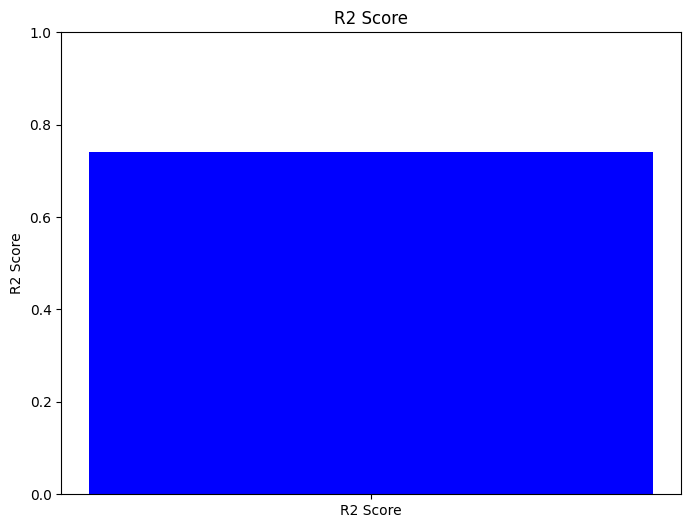

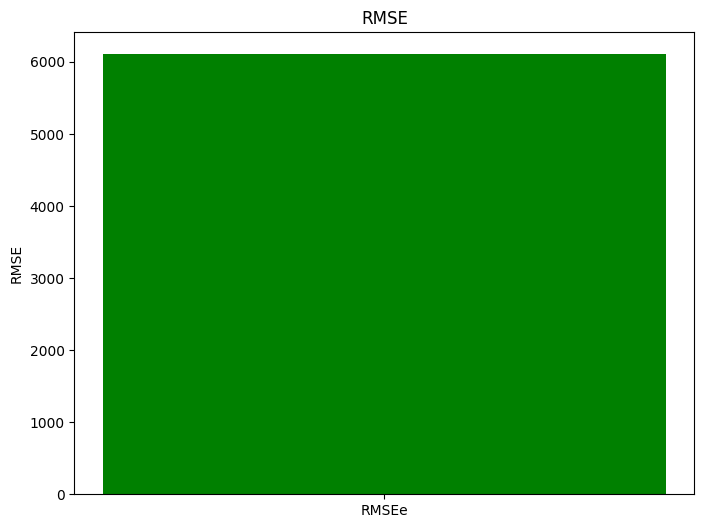

In [24]:

plt.figure(figsize=(8, 6))
plt.bar(["R2 Score"], [r2_mlr], color='blue')
plt.title("R2 Score")
plt.ylabel("R2 Score")
plt.ylim(0, 1)
plt.show()


# Plotting RMSE
plt.figure(figsize=(8, 6))
plt.bar(["RMSEe"], [rmse_mlr], color='green')
plt.title("RMSE")
plt.ylabel("RMSE")
plt.show()


# Principal Component Regression (PCR)

In [25]:
encoded_columns = pd.get_dummies(df[['sex', 'smoker', 'region']])
x_pcr = df.drop(["sex", "smoker","charges","region"], axis=1)
y_pcr = df["charges"]
x_pcr.head()


,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [26]:
x_pcr_ = pd.concat([x_pcr,encoded_columns.drop(["sex_male", "smoker_no"], axis=1)], axis=1)

x_pcr_

,age,bmi,children,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,1,0,0,0,1
1,18,33.770,1,0,0,0,0,1,0
2,28,33.000,3,0,0,0,0,1,0
3,33,22.705,0,0,0,0,1,0,0
4,32,28.880,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,0,0,0,1


In [27]:
x_pcr_train, x_pcr_test, y_pcr_train, y_pcr_test = train_test_split(x_pcr_, y_pcr, test_size = 0.20, random_state= 42)

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [29]:
x_reduced_train = pca.fit_transform(scale(x_pcr_train))
x_reduced_train.shape


(1070, 9)

In [30]:
x_pcr_train.shape

(1070, 9)

In [31]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:9] # Verinin ½ kaçını ifade ediyor

array([17.09, 32.07, 46.78, 58.97, 70.81, 81.48, 91.5 , 99.99, 99.99])

In [32]:
lm_pcr = LinearRegression()

In [33]:
pcr_model = lm_pcr.fit(x_reduced_train, y_pcr_train)


In [34]:
pcr_model.intercept_

13361.583655516757

In [35]:
pcr_model.coef_

array([ 1.77251317e+03, -1.21098263e+03,  9.58574994e+01,  1.43779721e+03,
        5.93839031e+03,  8.88620878e+02,  8.12008745e+03,  4.92804173e+02,
       -3.51282345e+17])

In [36]:
r2_pcr = pcr_model.score(x_pcr_train,y_pcr_train)
r2_pcr

c:\Users\bakisgan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-2.109430811831616e+26

In [37]:
y_pcr_pred = pcr_model.predict(x_reduced_train)

In [38]:
rmse_pcr = np.sqrt(mean_squared_error(y_pcr_train,y_pcr_pred))
rmse_pcr

6104.254048003593

In [39]:
pca2 = PCA()

In [40]:
x_reduced_test = pca2.fit_transform(scale(x_pcr_test))
x_reduced_test.shape

(268, 9)

In [41]:
y_pcr_pred2 = pcr_model.predict(x_reduced_test)

In [42]:
rmse_pcr_test = np.sqrt(mean_squared_error(y_pcr_test, y_pcr_pred2))
rmse_pcr_test

17278.188621856978

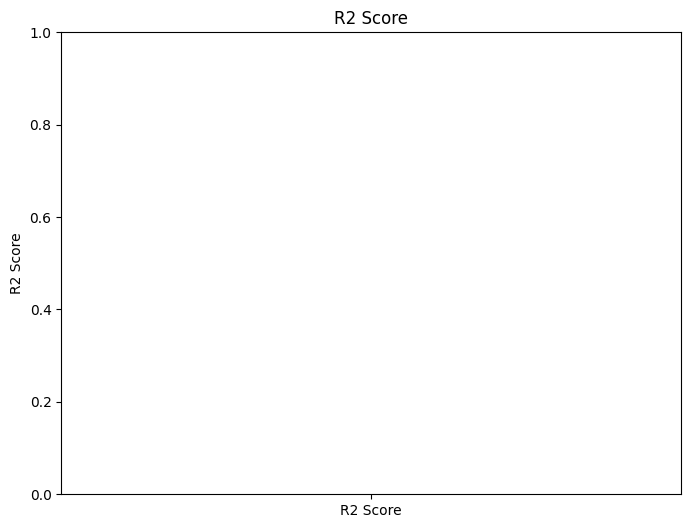

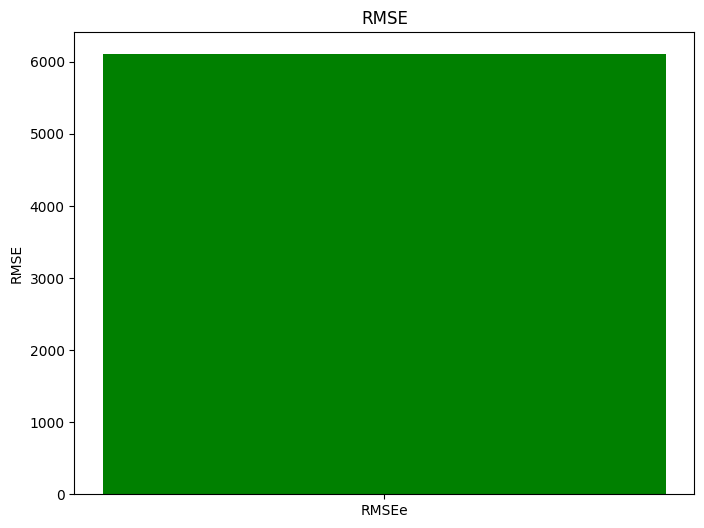

In [43]:
plt.figure(figsize=(8, 6))
plt.bar(["R2 Score"], [r2_pcr], color='blue')
plt.title("R2 Score")
plt.ylabel("R2 Score")
plt.ylim(0, 1)
plt.show()


# Plotting RMSE
plt.figure(figsize=(8, 6))
plt.bar(["RMSEe"], [rmse_pcr], color='green')
plt.title("RMSE")
plt.ylabel("RMSE")
plt.show()


# Partial Least Squares (PLS)

In [44]:
encoded_columns = pd.get_dummies(df[['sex', 'smoker', 'region']])
x_pls = df.drop(["sex", "smoker","charges","region"], axis=1)
y_pls = df["charges"]

x_pls_ = pd.concat([x_pls,encoded_columns.drop(["sex_male", "smoker_no"], axis=1)], axis=1)

x_pls_train, x_pls_test, y_pls_train, y_pls_test = train_test_split(x_pls_, y_pls, test_size = 0.20, random_state= 42)

from sklearn.cross_decomposition import PLSRegression, PLSSVD
pls_model = PLSRegression().fit(x_pls_train, y_pls_train)


In [45]:
pls_model.coef_

array([[3579.03354475, 1951.04140313,  651.63542776, -189.19925126,
        9566.58516721,  237.92030786,   36.30940424, -121.73277881,
        -150.21183846]])

In [46]:
pls_model.intercept_

array([13346.08973636])

In [47]:
y_pls_pred = pls_model.predict(x_pls_train)

In [48]:
rmse_pls = np.sqrt(mean_squared_error(y_pls_train,y_pls_pred))
rmse_pls

6111.569433132282

In [49]:
r2_pls = pls_model.score(x_pls_train,y_pls_train)
r2_pls

0.7412156610793212

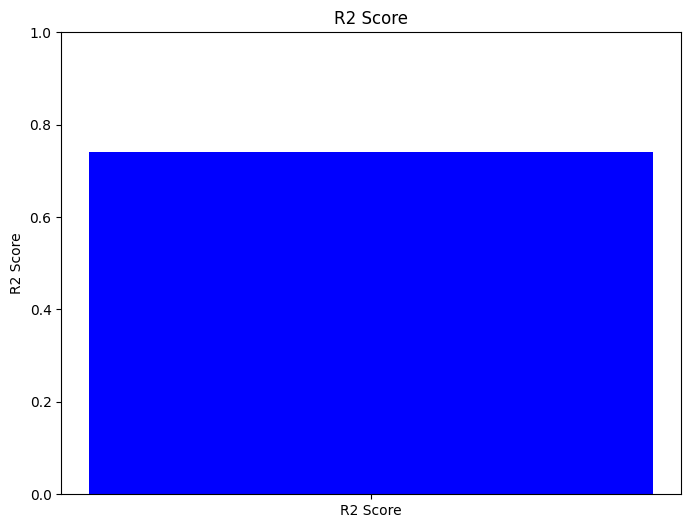

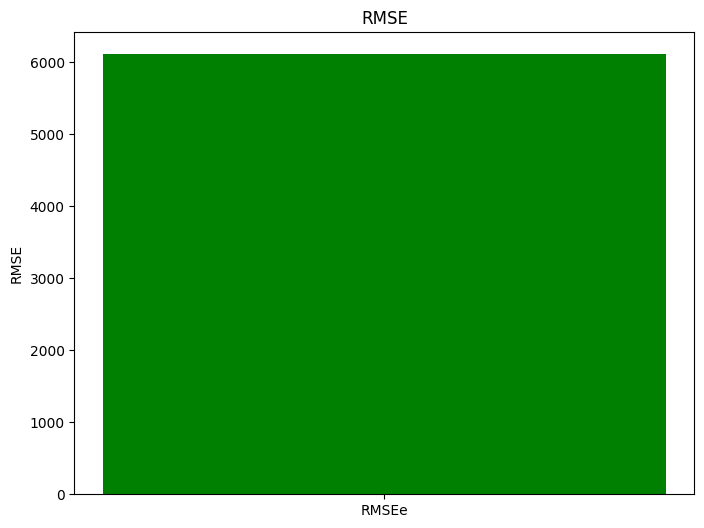

In [50]:
plt.figure(figsize=(8, 6))
plt.bar(["R2 Score"], [r2_pls], color='blue')
plt.title("R2 Score")
plt.ylabel("R2 Score")
plt.ylim(0, 1)
plt.show()


# Plotting RMSE
plt.figure(figsize=(8, 6))
plt.bar(["RMSEe"], [rmse_pls], color='green')
plt.title("RMSE")
plt.ylabel("RMSE")
plt.show()


# Ridge Regresyon

In [51]:
encoded_columns = pd.get_dummies(df[['sex', 'smoker', 'region']])
x_rr = df.drop(["sex", "smoker","charges","region"], axis=1)
y_rr = df["charges"]

x_rr_ = pd.concat([x_rr,encoded_columns.drop(["sex_male", "smoker_no"], axis=1)], axis=1)

x_rr_train, x_rr_test, y_rr_train, y_rr_test = train_test_split(x_rr_, y_rr, test_size = 0.20, random_state= 42)

In [52]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 0.1).fit(x_rr_train, y_rr_train)
ridge_model


Ridge(alpha=0.1)

In [53]:
ridge_model.coef_

array([ 2.56956267e+02,  3.37078624e+02,  4.25332547e+02,  1.77970013e+01,
        2.36374466e+04,  4.59499210e+02,  8.85585211e+01, -1.97685850e+02,
       -3.50371881e+02])

In [54]:
ridge_model.intercept_

-12405.076886435369

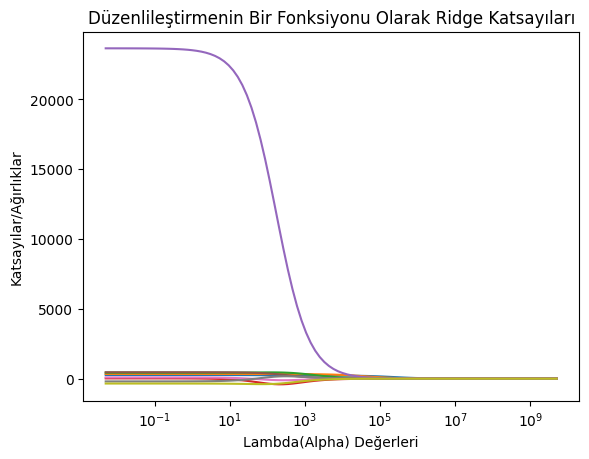

In [55]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(x_rr_train, y_rr_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

In [56]:
y_pred = ridge_model.predict(x_rr_test)
rmse_rr = np.sqrt(mean_squared_error(y_rr_test, y_pred))
rmse_rr

5796.303361591158

In [57]:
r2_rr = ridge_model.score(x_rr_train,y_rr_train)
r2_rr

0.7417255849440012

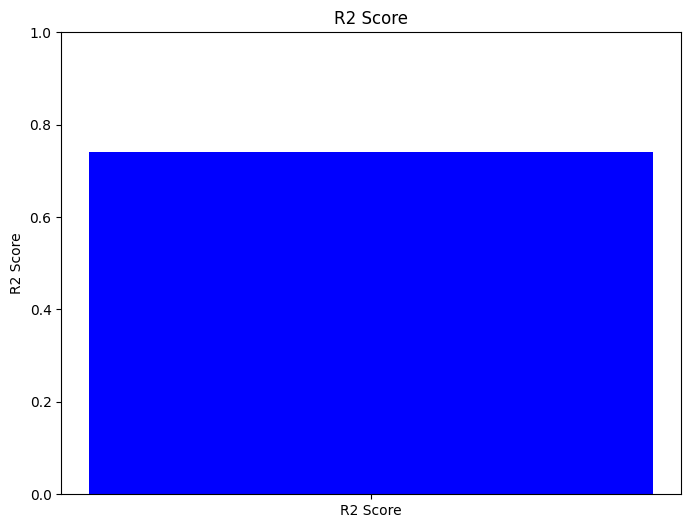

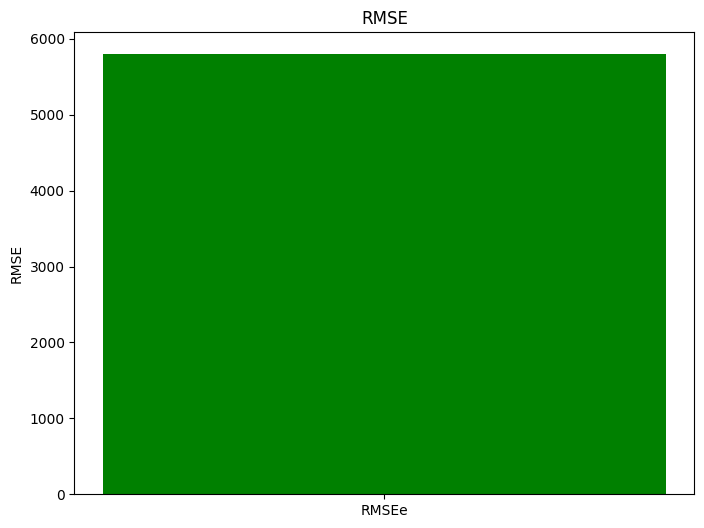

In [58]:
plt.figure(figsize=(8, 6))
plt.bar(["R2 Score"], [r2_rr], color='blue')
plt.title("R2 Score")
plt.ylabel("R2 Score")
plt.ylim(0, 1)
plt.show()


# Plotting RMSE
plt.figure(figsize=(8, 6))
plt.bar(["RMSEe"], [rmse_rr], color='green')
plt.title("RMSE")
plt.ylabel("RMSE")
plt.show()

# Lasso Regresyon

In [59]:
encoded_columns = pd.get_dummies(df[['sex', 'smoker', 'region']])
x_lr = df.drop(["sex", "smoker","charges","region"], axis=1)
y_lr = df["charges"]

x_lr_ = pd.concat([x_lr,encoded_columns.drop(["sex_male", "smoker_no"], axis=1)], axis=1)

x_lr_train, x_lr_test, y_lr_train, y_lr_test = train_test_split(x_lr_, y_lr, test_size = 0.20, random_state= 42)

In [60]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.1).fit(x_rr_train, y_rr_train)
lasso_model


Lasso(alpha=0.1)

In [61]:
lasso_model.coef_


array([ 2.56974491e+02,  3.37091872e+02,  4.25211923e+02,  1.81473426e+01,
        2.36504998e+04,  6.84162266e+02,  3.13323152e+02,  2.60740008e+01,
       -1.25241235e+02])

In [62]:
lasso_model.intercept_

-12633.483985581095

Text(0, 0.5, 'weights')

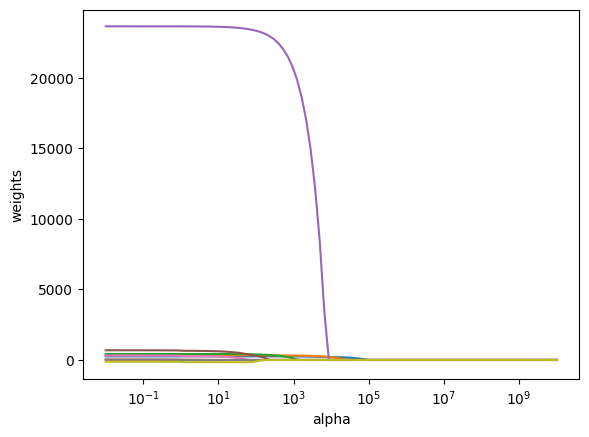

In [63]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(x_lr_train, y_lr_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [64]:
y_rr_pred = lasso_model.predict(x_rr_test)

In [65]:
rmse_lr = np.sqrt(mean_squared_error(y_rr_test, y_rr_pred))
rmse_lr

5796.307465125308

In [66]:
r2_lr = lasso_model.score(x_rr_train, y_rr_train)
r2_lr

0.7417255842627745

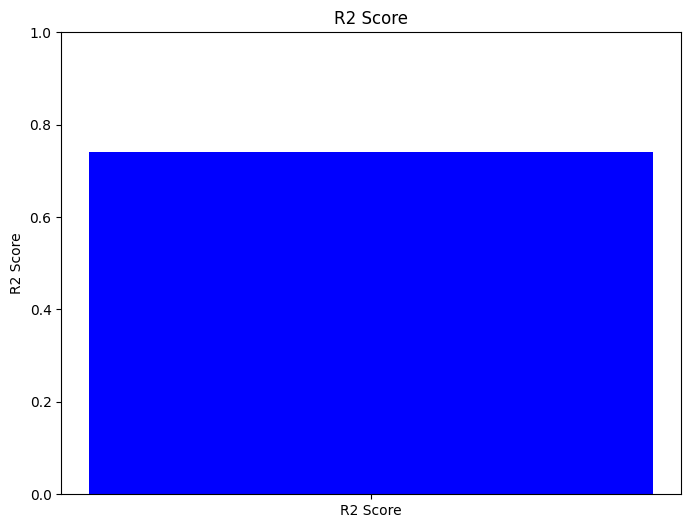

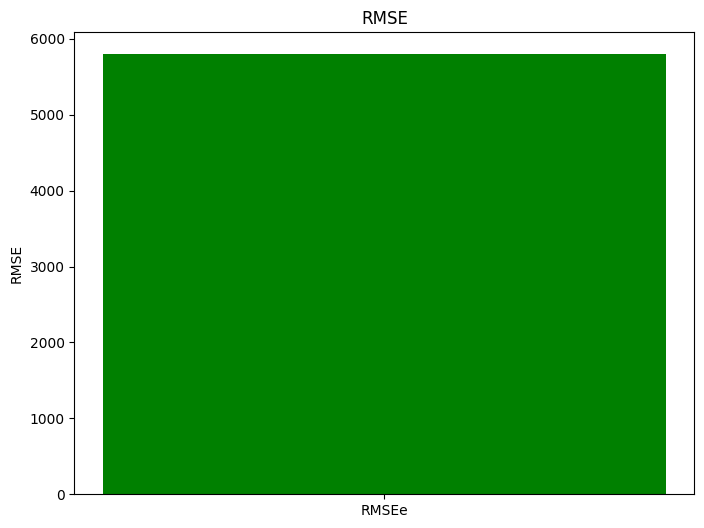

In [67]:
plt.figure(figsize=(8, 6))
plt.bar(["R2 Score"], [r2_lr], color='blue')
plt.title("R2 Score")
plt.ylabel("R2 Score")
plt.ylim(0, 1)
plt.show()


# Plotting RMSE
plt.figure(figsize=(8, 6))
plt.bar(["RMSEe"], [rmse_lr], color='green')
plt.title("RMSE")
plt.ylabel("RMSE")
plt.show()